# ***0. CONNECT GGDRIVE***  - for data processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/drive/MyDrive/colab
%cd /content/drive/MyDrive/colab


mkdir: cannot create directory ‘/content/drive/MyDrive/colab’: File exists
/content/drive/MyDrive/colab


# ***1. Load WIDERFACE Dataset (TRAINING) - EDA - Processing Yolov5***

# ***1'. Download the kaggle dataset THAT I PROCESSED IN THE PREVIOUS STEP AND UPLOAD TO KAGGLE***
- https://www.kaggle.com/datasets/cngonngc/facedetection-widerfacedataset-yolov5-zip
- Dataset upload Drive is also quite convenient, but the synchronization speed is slow when switching between different accounts to use free GPU.-> ZIP FILE to upload to Kaggle dataset, downloading is more convenient when using.


# ***1''. Load EVALUATION Dataset - EDA - Processing Yolov5***
- FOR EVALUATION

## 1.1 CELEBA Dataset

Dataset
- https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html (lỗi bboxes)
- https://datasets.activeloop.ai/docs/ml/datasets/celeba-dataset/
- https://www.kaggle.com/datasets/jessicali9530/celeba-dataset  (lỗi bboxes)


## 1.2 EDA

In [3]:
!pip install deeplake


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8

/

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/celeb-a-train



/usr/local/lib/python3.10/dist-packages/deeplake/api/dataset.py:754: UserWarning: Dataset has more than 20 tensors. Skipping integrity check. Specify `check_integrity=True` to perform integrity check.
  warnings.warn(

/

hub://activeloop/celeb-a-train loaded successfully.



(Tensor(key='images', index=Index([slice(None, 10, None)])),)
Tensor(key='boxes', index=Index([slice(None, 10, None)]))
Tensor(key='images', index=Index([0]))
Shape of the image: (295, 285, 3)
Data type of the image: uint8
[[[255 250 224]
  [234 231 198]
  [187 194 150]
  ...
  [123  22  36]
  [121  28  39]
  [122  35  44]]

 [[247 240 214]
  [224 221 188]
  [177 184 140]
  ...
  [120  19  33]
  [118  25  36]
  [119  32  41]]

 [[245 238 212]
  [222 219 186]
  [175 182 138]
  ...
  [119  18  32]
  [117  24  35]
  [118  31  40]]

 ...

 [[195 162 117]
  [197 164 119]
  [201 168 125]
  ...
  [130  29  37]
  [135  23  35]
  [134  15  34]]

 [[188 155 110]
  [195 162 117]
  [204 171 128]
  ...
  [130  29  37]
  [135  23  35]
  [134  15  34]]

 [[186 153 108]
  [195 162 117]
  [206 173 130]
  ...
  [130  29  37]
  [135  23  35]
  [134  15  34]]]
Shape of the image: (295, 285, 3)
Data type of the image: uint8


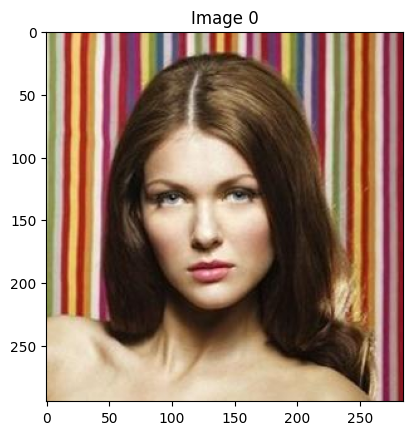

Box shape for image 0: (1, 4)
First bounding box for image 0 (if multiple): [ 54.  59. 148. 205.]


In [4]:
import deeplake
ds_train = deeplake.load("hub://activeloop/celeb-a-train")[:10]
print(ds_train)

img_list_train = ds_train['images'],
anno_list_train = ds_train['boxes']
print(img_list_train)
print(anno_list_train)

import numpy as np
import matplotlib.pyplot as plt
# Xem qua một số hình ảnh từ tập huấn luyện
i=0
image = ds_train['images'][i]  # Tensor(key='images', index=Index([0]))
print(image)
# In hình dạng và kiểu dữ liệu của ảnh
print("Shape of the image:", image.shape) # Shape of the image: (295, 285, 3)
print("Data type of the image:", image.dtype) # Data type of the image: uint8

image = ds_train['images'][i].numpy()  # Chuyển tensor sang NumPy array
print(image) # Numpy array
print("Shape of the image:", image.shape) # Shape of the image: (295, 285, 3)
print("Data type of the image:", image.dtype) # Data type of the image: uint8

# Hiển thị ảnh
plt.imshow(image)
plt.title(f"Image {i}")
plt.show()

# In thông tin cấu trúc của bounding box
box = ds_train['boxes'][i].numpy()  # Lấy thông tin bounding box và chuyển sang NumPy array
print(f"Box shape for image {i}:", box.shape)
print(f"First bounding box for image {i} (if multiple):", box[0])



```python
image = ds_train['images'][i].numpy()  # Chuyển tensor sang NumPy array
box = ds_train['boxes'][i].numpy()  # Lấy thông tin bounding box và chuyển sang NumPy array
```
- bb dạng: x_min, y_min, width, height

## 1.3 Load Images and Bouding Boxes from deeplake to local colab
Khi bạn sử dụng `deeplake.load` để tải bộ dữ liệu từ Activeloop Hub, bộ dữ liệu được tải trực tiếp vào bộ nhớ của môi trường Python mà bạn đang sử dụng, như Google Colab hoặc Kaggle Kernel. Nó không được lưu trữ trên ổ cứng hoặc bất kỳ thiết bị lưu trữ vật lý nào, trừ khi bạn chủ động thực hiện việc lưu nó.

Dữ liệu trong `ds_train` sau khi chạy đoạn mã của bạn sẽ tồn tại dưới dạng một đối tượng trong bộ nhớ, có thể truy cập và xử lý trong phiên làm việc Python hiện tại của bạn. Khi bạn ngắt kết nối từ Colab hoặc Kaggle Kernel, hoặc khi phiên của bạn hết hạn, dữ liệu này sẽ bị mất trừ khi bạn đã lưu nó vào một nơi lưu trữ khác như Google Drive hoặc Kaggle Datasets.

Nếu bạn muốn lưu một phần hoặc toàn bộ bộ dữ liệu này vào ổ cứng hoặc một dịch vụ lưu trữ đám mây, bạn cần viết mã để thực hiện việc lưu trữ đó. Điều này thường bao gồm việc chuyển dữ liệu vào định dạng phù hợp (ví dụ, hình ảnh thành các file ảnh, dữ liệu tabular thành CSV) và sau đó sử dụng các API hoặc thư viện để lưu nó vào vị trí mong muốn.

In [5]:
!mkdir custom_dataset
!mkdir custom_dataset/images_and_labels
!mkdir custom_dataset/images_and_labels/images
!mkdir custom_dataset/images_and_labels/labels

mkdir: cannot create directory ‘custom_dataset’: File exists
mkdir: cannot create directory ‘custom_dataset/images_and_labels’: File exists


In [6]:
import deeplake
import os
from PIL import Image
import numpy as np

# Load the dataset using deeplake
ds_train = deeplake.load("hub://activeloop/celeb-a-train")[:10]

# Create a directory to save images if it does not exist
save_path = "custom_dataset/images_and_labels/images/train"
os.makedirs(save_path, exist_ok=True)

# Save images to the directory
for i in range(len(ds_train['images'])):  # Assuming 'image' is the key for images
    image_array = ds_train['images'][i].numpy()  # Convert to numpy array
    if image_array.ndim == 3 and image_array.shape[2] == 3:  # Check if image is in correct format
        image = Image.fromarray(image_array)
        image_path = os.path.join(save_path, f'image_{i}.png')
        image.save(image_path, "PNG")

print("Images saved successfully.")


/

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/celeb-a-train



/

hub://activeloop/celeb-a-train loaded successfully.



Images saved successfully.


Để xử lý thông tin bounding box từ bộ dữ liệu CelebA và viết chúng vào các file `.txt` theo định dạng của YOLOv5, bạn cần thực hiện các bước sau:

1. **Xác Định Tọa Độ Bounding Box**: Trong YOLOv5, bounding box được biểu diễn bởi tọa độ x_center, y_center, width, và height. Tuy nhiên, tọa độ trong CelebA có thể được biểu diễn dưới dạng x_min, y_min, width, và height. Do đó, bạn cần chuyển đổi chúng.

2. **Chuyển Đổi Tọa Độ**:
   - x_center = x_min + (width / 2)
   - y_center = y_min + (height / 2)

3. **Normalize Tọa Độ**: Trong YOLOv5, tọa độ thường được chuẩn hóa theo kích thước của ảnh. Điều này có nghĩa là x_center, y_center, width, và height đều là phần trăm tương đối của kích thước ảnh.
   - x_center = x_center / chiều rộng ảnh
   - y_center = y_center / chiều cao ảnh
   - width = width / chiều rộng ảnh
   - height = height / chiều cao ảnh

4. **Lưu vào File `.txt`**: Mỗi ảnh sẽ có một file `.txt` tương ứng với nội dung là "0" và tọa độ bounding box đã được chuẩn hóa và chuyển đổi.


In [7]:
import os

# Tạo thư mục để lưu file .txt nếu chưa tồn tại
txt_save_path = "custom_dataset/images_and_labels/labels/train"
os.makedirs(txt_save_path, exist_ok=True)

for i in range(len(ds_train['images'])):
    image = ds_train['images'][i].numpy()
    box = ds_train['boxes'][i].numpy()[0]  # Giả sử chỉ có một bounding box cho mỗi ảnh

    # Chuyển đổi tọa độ
    x_center = box[0] + (box[2] / 2)
    y_center = box[1] + (box[3] / 2)

    # Normalize tọa độ
    x_center /= image.shape[1]  # Chia cho chiều rộng ảnh
    y_center /= image.shape[0]  # Chia cho chiều cao ảnh
    width_norm = box[2] / image.shape[1]
    height_norm = box[3] / image.shape[0]

    # Tạo nội dung cho file .txt
    txt_content = f"0 {x_center} {y_center} {width_norm} {height_norm}"

    # Lưu nội dung vào file .txt
    txt_filename = f"image_{i}.txt"  # Hoặc sử dụng tên ảnh nếu có
    with open(os.path.join(txt_save_path, txt_filename), 'w') as f:
        f.write(txt_content)

print("Bounding box annotations saved successfully.")



Bounding box annotations saved successfully.


## 1.4 Processing: Train - Val - Test for Yolov5s

- https://github.com/deepakat002/yolov5_facemask
- https://www.pandaml.com/train-yolov5/
- https://www.kaggle.com/datasets/deepakat002/face-mask-detection-yolov5

```
yolov5
custom_dataset
├── custom_dataset.yaml
├── custom_model.yaml
└── images_and_labels
```

```
images_and_labels
├── images
│   ├── train
│   │   ├── train_001.jpg
│   │   ├── train_002.jpg
│   │   └── ...
│   ├── valid
│   │   ├── valid_001.jpg
│   │   ├── valid_002.jpg
│   │   └── ...
│   └── test
│       ├── test_001.jpg
│       ├── test_002.jpg
│       └── ...
└── labels
  ├── train
  │   ├── train_001.txt
  │   ├── train_002.txt
  │   └── ...
  └── valid
      ├── valid_001.txt
      ├── valid_002.txt
      └── ...
```
hoặc
```
images_and_labels
├── train
│   ├── images
│   │   ├── train_001.jpg
│   │   ├── train_002.jpg
│   │   └── ...
│    ── labels
│       ├── train_001.txt
│       ├── train_002.txt
│       └── ...                
└── val
  ├── images
  │   ├── valid_001.jpg
  │   ├── valid_002.jpg
  │   └── ...
  └── labels
      ├── valid_001.txt
      ├── valid_002.txt
      └── ...
```

In [17]:
import deeplake
import os
from PIL import Image
import numpy as np

def process_dataset(ds, images_path, labels_path, dataset_type):
    os.makedirs(images_path, exist_ok=True)
    os.makedirs(labels_path, exist_ok=True)

    for i, (image_array, box) in enumerate(zip(ds['images'], ds['boxes'])):
        if image_array.ndim == 3 and image_array.shape[2] == 3:
            # Save image
            image = Image.fromarray(image_array.numpy())
            image_path = os.path.join(images_path, f'image_{i}.png')
            image.save(image_path, "PNG")

            # Save bounding box
            box = box.numpy()[0]
            x_center, y_center = box[0] + box[2] / 2, box[1] + box[3] / 2
            x_center /= image_array.shape[1]
            y_center /= image_array.shape[0]
            width_norm = box[2] / image_array.shape[1]
            height_norm = box[3] / image_array.shape[0]
            txt_content = f"0 {x_center} {y_center} {width_norm} {height_norm}"
            txt_filename = f"image_{i}.txt"
            with open(os.path.join(labels_path, txt_filename), 'w') as f:
                f.write(txt_content)

    print(f"{dataset_type} images and annotations saved successfully.")

# Define paths
base_path = "custom_dataset/images_and_labels"
image_paths = {
    "train": os.path.join(base_path, "images/train"),
    "valid": os.path.join(base_path, "images/valid"),
    "test": os.path.join(base_path, "images/test")
}
label_paths = {
    "train": os.path.join(base_path, "labels/train"),
    "valid": os.path.join(base_path, "labels/valid"),
    "test": os.path.join(base_path, "labels/test")
}

# Load datasets
ds_train = deeplake.load("hub://activeloop/celeb-a-train")[:10]
ds_val = deeplake.load("hub://activeloop/celeb-a-val")[:1]
ds_test = deeplake.load("hub://activeloop/celeb-a-test")[:1]

# Process datasets
process_dataset(ds_train, image_paths['train'], label_paths['train'], "Train")
process_dataset(ds_val, image_paths['valid'], label_paths['valid'], "Validation")
process_dataset(ds_test, image_paths['test'], label_paths['test'], "Test")



\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/celeb-a-train



-

hub://activeloop/celeb-a-train loaded successfully.



/usr/local/lib/python3.10/dist-packages/deeplake/api/dataset.py:754: UserWarning: Dataset has more than 20 tensors. Skipping integrity check. Specify `check_integrity=True` to perform integrity check.
  warnings.warn(



Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/celeb-a-val



\

hub://activeloop/celeb-a-val loaded successfully.



|

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/celeb-a-test



/

hub://activeloop/celeb-a-test loaded successfully.



Train images and annotations saved successfully.
Validation images and annotations saved successfully.
Test images and annotations saved successfully.


# ***2. Model: Yolov5s***

## ***2.1 PREPARE custom_dataset.yaml and custom_model.yaml***

### 2.1.1 Write custom_dataset.yaml

In [9]:
!mkdir /content/drive/MyDrive/colab/custom_dataset  # báo file exists code dưới vẫn chạy nhá

# Create and write to a file (cách tạo file trong kaggle luôn rùi)
with open('/content/drive/MyDrive/colab/custom_dataset/custom_dataset.yaml', 'w') as file:  # write ghi đè, a (append mode)
    file.write("""

# train: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/train
# val: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/val
test: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/test

# number of classes
nc: 1
# class names
names: ['face']
""")


mkdir: cannot create directory ‘/content/drive/MyDrive/colab/custom_dataset’: File exists


## ***2.2 TRAINING YOLOV5 (same PaddleOCR use)*** with command line training - shell script training



Đồ thị wandb cho thấy, sau 20 epochs, model cải thiện nhưng ko đáng kể so với tốc độ cải thiện của 10 epochs đầu (Cũng cho thấy 10 epochs đầu quá ukii)

## 2.3 INFER - PREDECTION - SMALL REAL TESTING:
train: 12880, val: 3226, Test: hơn 3000 images... Without pretrained model: yolov5s.pt,
use config /content/drive/MyDrive/colab/yolov5/models/yolov5s.yaml


### 2.3.1 Model trained 10 epochs

In [10]:
!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r yolov5/requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [11]:
# with model_best_10 epoch

# Load trained model - 10 epochs KẾT QUẢ ĐÃ QUÁ LÀ ẤN TƯỢNG
!pip install wandb
import wandb

wandb.login(key = "c8767797aae76cbcd389ff29929ace1ac3021161")    # key's DoanNgocCuong
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/FaceDetection_Yolov5/facedet_widerface_cfgyolov5_colab:v0', type='model')
artifact_dir = artifact.download()




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 18.1 MB/s eta 0:00:00


wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: doanngoccuong (doanngoccuong_nh). Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  


### 2.3.2 Model trained 110 epochs

In [12]:
# model trained 110 epochs
%cd /content/drive/MyDrive/colab
import wandb
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/FaceDetection_Yolov5/run_wtfobpvn_model:best_trained_110epos', type='model')
artifact_dir = artifact.download()

/content/drive/MyDrive/colab


wandb:   1 of 1 files downloaded.  


In [13]:
# Infer real_test# Infer real_test
# optional:  --img 640 --save-txt --save-conf (resize, save txt, save confident)
# optional: --save-csv: predictions.csv (face, conf). --save-crop
# OR Crop Detected Face use labels file txt: face_img = image[y1:y2, x1:x2] = image[y_min:y_max, x_min:x_max]

%cd /content/drive/MyDrive/colab/yolov5
!python detect.py --source /content/doquanminh_2.jpg \
                  --weights /content/drive/MyDrive/colab/artifacts/run_wtfobpvn_model:v0/best.pt \
                  --save-txt --save-conf --save-crop --save-csv


/content/drive/MyDrive/colab/yolov5
detect: weights=['/content/drive/MyDrive/colab/artifacts/run_wtfobpvn_model:v0/best.pt'], source=/content/doquanminh_2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-267-gc42aba5 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/content/drive/MyDrive/colab/yolov5/detect.py", line 295, in <module>
    main(opt)
  File "/content/drive/MyDrive/colab/yolov5/detect.py", line 290, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.1

## 2.4 INFER - EVALUATION on BIG TESTSET

```python
# val.py
def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='dataset.yaml path')
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path(s)')
    parser.add_argument('--batch-size', type=int, default=32, help='batch size')
    parser.add_argument('--imgsz', '--img', '--img-size', type=int, default=640, help='inference size (pixels)')
    parser.add_argument('--conf-thres', type=float, default=0.001, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.6, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=300, help='maximum detections per image')
    parser.add_argument('--task', default='val', help='train, val, test, speed or study')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--workers', type=int, default=8, help='max dataloader workers (per RANK in DDP mode)')
    parser.add_argument('--single-cls', action='store_true', help='treat as single-class dataset')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--verbose', action='store_true', help='report mAP by class')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-hybrid', action='store_true', help='save label+prediction hybrid results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-json', action='store_true', help='save a COCO-JSON results file')
    parser.add_argument('--project', default=ROOT / 'runs/val', help='save to project/name')
    parser.add_argument('--name', default='exp', help='save to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    opt = parser.parse_args()
    opt.data = check_yaml(opt.data)  # check YAML
    opt.save_json |= opt.data.endswith('coco.yaml')
    opt.save_txt |= opt.save_hybrid
    print_args(vars(opt))
    return opt

```

### 2.4.1 Xem lại custom_dataset.yaml

In [27]:
!mkdir /content/drive/MyDrive/colab/custom_dataset  # báo file exists code dưới vẫn chạy nhá

# Create and write to a file (cách tạo file trong kaggle luôn rùi)
with open('/content/drive/MyDrive/colab/custom_dataset/custom_dataset.yaml', 'w') as file:  # write ghi đè, a (append mode)
    file.write("""

# train and val path: bắt buộc phải có trong .yaml   VÀ test: KO CÓ GIÁ TRỊ TRONG .yaml
train: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/train

# val: /content/minh
val: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/test
# val: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/train


# number of classes
nc: 1
# class names
names: ['face']
""")


mkdir: cannot create directory ‘/content/drive/MyDrive/colab/custom_dataset’: File exists


### 2.4.2 Eval

- Reference: https://github.com/rafaelpadilla/Object-Detection-Metrics
- https://github.com/ultralytics/yolov5/blob/master/val.py
- https://github.com/ultralytics/yolov5/blob/master/utils/metrics.py

Mean IOU là trung bình cộng của IOU cho tất cả các dự đoán đối tượng trong một tập dữ liệu.

In [21]:
# model trained 110 epochs
%cd /content/drive/MyDrive/colab
import wandb
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/FaceDetection_Yolov5/run_wtfobpvn_model:best_trained_110epos', type='model')
artifact_dir = artifact.download()

/content/drive/MyDrive/colab


wandb:   1 of 1 files downloaded.  


In [35]:
# train and val path: bắt buộc phải có trong .yaml   VÀ test: KO CÓ GIÁ TRỊ TRONG .yaml
# Đảm bảo cấu hình đồng nhất, dễ quản lý, không cần thay đổi file cấu hình khi chuyển giữa đào tạo và đánh giá.
# Cho phép script kiểm tra tính hợp lệ của cấu hình và sử dụng thông tin về lớp từ tập đào tạo để xác minh dữ liệu đánh giá.
# Hỗ trợ các hành động nâng cao trong quá trình đánh giá, như fine-tuning hoặc các phép đo đánh giá khác.

# train: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/train
# val: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/test
# or
# train: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/test
# val: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/test
# RA CÙNG 1 KẾT QUẢ

with open('/content/drive/MyDrive/colab/custom_dataset/custom_dataset.yaml', 'w') as file:  # write ghi đè, a (append mode)
    file.write("""
train: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/train
val: /content/drive/MyDrive/colab/custom_dataset/images_and_labels/images/train
nc: 1
names: ['face']
""")

%cd /content/drive/MyDrive/colab/yolov5
!python val.py --weights /content/drive/MyDrive/colab/artifacts/run_wtfobpvn_model:v0/best.pt \
              --data /content/drive/MyDrive/colab/custom_dataset/custom_dataset.yaml \
              --img 640 --batch-size 32 --conf-thres 0.001 --iou-thres 0.5 \

# --save-txt --save-hybrid --save-conf --save-json  (results.txt: label, x_center, y_center, width, height, conf)



/content/drive/MyDrive/colab/yolov5
val: data=/content/drive/MyDrive/colab/custom_dataset/custom_dataset.yaml, weights=['/content/drive/MyDrive/colab/artifacts/run_wtfobpvn_model:v0/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-267-gc42aba5 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/colab/custom_dataset/images_and_labels/labels/train.cache... 1000 images, 0 backgrounds, 0 corrupt: 100% 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 32/32 [00:31<00:00,  1.02it/s]
                   all       1000       1000    

Dòng 287
    # Print results
    pf = '%22s' + '%11i' * 2 + '%11.3g' * 4  # print format
    LOGGER.info(pf % ('all', seen, nt.sum(), mp, mr, map50, map))
    if nt.sum() == 0:
        LOGGER.warning(f'WARNING ⚠️ no labels found in {task} set, can not compute metrics without labels')


### 2.4.3 Detail Metrics

Các chỉ số mAP@0.5 và mAP@0.5:0.95 đều có liên quan mật thiết đến IOU (Intersection over Union), và đây là cách chúng được tính toán:

### IOU (Intersection over Union)
IOU là tỷ lệ giữa khu vực giao nhau (intersection) và khu vực hợp nhau (union) của bounding box dự đoán và bounding box thực tế (ground truth):
$$
IOU = \frac{\text{Area of Overlap}}{\text{Area of Union}}
$$

### Precision (Độ chính xác)
Precision là tỷ lệ giữa số lượng dự đoán đúng (true positives) và tổng số dự đoán đúng và sai (true positives + false positives):
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

### Recall (Độ phủ)
Recall là tỷ lệ giữa số lượng dự đoán đúng và tổng số trường hợp thực tế (true positives + false negatives):
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

### F1 Score
F1 Score là trung bình điều hòa của Precision và Recall:
$$
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### mAP@0.5 (mean Average Precision at IOU 0.5)
mAP@0.5 là trung bình của Average Precision (AP) cho tất cả các lớp tại ngưỡng IOU = 0.5. AP cho một lớp được tính bằng cách tính diện tích dưới đường cong Precision-Recall, và sau đó lấy trung bình cho tất cả các lớp.

### mAP@0.5:0.95
mAP@0.5:0.95 là trung bình của AP được tính cho các ngưỡng IOU từ 0.5 đến 0.95 (thường là tại các ngưỡng 0.5, 0.55, ..., 0.95). Điều này cho một cái nhìn toàn diện hơn về hiệu suất của mô hình trên nhiều ngưỡng IOU khác nhau, không chỉ tại một ngưỡng cụ thể.

Công thức tính AP cho mỗi lớp có thể được viết như sau:
$$
\text{AP} = \int_{0}^{1} p(r) dr
$$
trong đó \( p(r) \) là hàm Precision theo Recall \( r \). Đối với mAP@0.5:0.95, AP được tính tại mỗi IOU từ 0.5 đến 0.95 và sau đó lấy trung bình các giá trị AP này.

Để tính toán mAP, bạn thường cần một tập hợp các dự đoán đã được sắp xếp theo độ tin cậy và thực hiện Non-Maximum Suppression (NMS) sử dụng ngưỡng IOU cụ thể để loại bỏ các bounding box chồng lấp. Sau đó, bạn sử dụng các dự đoán còn lại để tính Precision và Recall ở nhiều ngưỡng độ tin cậy, từ đó vẽ đường cong Precision-Recall và tính diện tích dưới đường cong (AUC) để có được AP. Mỗi AP tại một ngưỡng IOU cụ thể sẽ đóng góp vào tính toán mAP cuối cùng.


Để có thêm thông tin về IOU trong kết quả đầu ra của YOLOv5 khi chạy `val.py`,

1. **Tính toán IOU**: Thêm mã để tính toán IOU cho mỗi dự đoán đúng (true positive) và lưu trữ kết quả.

2. **Chỉnh sửa hàm `process_batch`**: Hàm này xử lý từng batch của dự đoán và nhãn, nơi bạn có thể thêm tính toán IOU cụ thể cho mỗi dự đoán đối với nhãn đích thực của nó.

3. **Hiển thị IOU**: Sau khi tính toán IOU, bạn có thể thêm chúng vào bảng kết quả cuối cùng được in ra màn hình hoặc lưu vào tệp.

Dưới đây là một ví dụ cách bạn có thể sửa đổi mã để thực hiện điều này:

### Bước 1: Tính IOU Trong `process_batch`
Bạn cần chỉnh sửa hàm `process_batch` để trả về cả IOU của mỗi dự đoán đối với ground truth. Hãy tìm hàm `process_batch` trong mã và sửa đổi nó để tính toán và trả về IOU.

### Bước 2: Hiển thị IOU
Trong vòng lặp chính của `val.py` nơi kết quả được thu thập và in ra, bạn có thể thêm IOU vào đầu ra.

### Bước 3: In IOU Trong Đầu Ra
Sau khi đã có IOU được tính toán, thêm nó vào thông báo LOGGER hoặc in nó ra màn hình tại vị trí phù hợp.

Mã giả phía dưới sẽ giúp bạn hình dung cách tiếp cận:

```python
# ... mã trước đó ...

def process_batch(detections, labels, iouv):
    # ... mã đã có ...
    # Tính toán IOU tại đây và trả về kết quả
    ious = box_iou(labels[:, 1:], detections[:, :4])  # Tính IOU giữa dự đoán và labels
    return torch.tensor(correct, dtype=torch.bool, device=iouv.device), ious

# ... mã sau đó ...

# Trong vòng lặp chính của val.py, sau khi gọi process_batch
ious = []  # Danh sách để giữ tất cả IOU
for batch_i, (im, targets, paths, shapes) in enumerate(pbar):
    # ... mã đã có ...
    correct, iou = process_batch(predn, labelsn, iouv)  # Nhận IOU từ process_batch
    ious.append(iou)  # Thêm IOU vào danh sách

# ... mã sau đó ...

# Khi in kết quả ra màn hình
ious = torch.cat(ious, 0)  # Ghép tất cả IOU lại với nhau
mean_iou = ious.mean().item()  # Tính mean IOU
LOGGER.info(f"Mean IOU: {mean_iou:.4f}")  # In Mean IOU ra màn hình
```


Để thêm thông tin IOU vào LOGGER trong đoạn mã bạn đã cung cấp, bạn sẽ cần lưu trữ các giá trị IOU từ mỗi batch và sau đó tính toán giá trị trung bình của chúng. Đây là cách bạn có thể thực hiện:

1. **Tính IOU cho Mỗi Dự Đoán**: Bạn cần sửa đổi hàm `process_batch` để trả về IOU cho mỗi dự đoán đối với nhãn đích thực của nó, như đã mô tả trước đây.

2. **Lưu Trữ và Tính IOU Trung Bình**: Trong vòng lặp chính xử lý từng batch, lưu trữ các giá trị IOU vào một danh sách hoặc tensor.

3. **Log IOU Trung Bình**: Sau khi hoàn thành vòng lặp xử lý tất cả batches, tính IOU trung bình và sử dụng LOGGER để in nó ra.

Đây là cách bạn có thể thực hiện:

```python
# ... mã trước đó ...

ious = []  # Khởi tạo danh sách để lưu IOU
for batch_i, (im, targets, paths, shapes) in enumerate(pbar):
    # ... mã đã có ...
    correct, iou = process_batch(predn, labelsn, iouv)  # Nhận IOU từ process_batch
    ious.append(iou)  # Lưu IOU vào danh sách

# ... mã sau đó ...

# Sau khi xử lý tất cả batches, tính IOU trung bình
mean_iou = np.concatenate(ious, 0).mean() if ious else 0
LOGGER.info(f'Mean IOU: {mean_iou:.4f}')  # Log IOU trung bình
```

Trong đoạn mã trên, `ious` là một danh sách chứa các giá trị IOU từ mỗi dự đoán đúng. Sau khi vòng lặp chính kết thúc, chúng ta sẽ tính giá trị trung bình của tất cả giá trị IOU và sau đó in ra thông qua LOGGER.

Hãy nhớ rằng các thay đổi mã nguồn cần phải được kiểm tra cẩn thận để đảm bảo tính chính xác và không làm hỏng bất kỳ chức năng hiện có nào. Ngoài ra, phần `if ious` kiểm tra xem có ít nhất một phần tử trong danh sách `ious` trước khi cố gắng tính toán mean để tránh lỗi nếu không có giá trị IOU nào (trường hợp không có dự đoán nào đúng).